In [2]:
import pandas as pd
import glob

# 특정 패턴에 맞는 모든 CSV 파일의 리스트를 가져옵니다.
file_paths = glob.glob('*세세분류별_총괄*.csv')

dataframes = []

for file_path in file_paths:
    # 헤더 없이 CSV 파일을 읽어옵니다.
    df = pd.read_csv(file_path, header=None, encoding='cp949')
    
    # 0번째 행을 가져옵니다.
    row_zero = df.iloc[0]
    
    # '시점' 열을 row_zero로 삽입합니다.
    df.insert(0, '시점', row_zero)
    
    # 0번째 행을 삭제합니다.
    df = df.drop(df.index[0]).reset_index(drop=True)
    
    # '시점' 열의 내용을 아래로 한 칸 이동시킵니다.
    df['시점'] = df['시점'].shift(1)
    
    # (0, 0) 위치에 '시점'을 넣습니다.
    df.loc[0, '시점'] = '시점'
    
    dataframes.append(df)

# 모든 데이터프레임을 하나로 합칩니다.
combined_df = pd.concat(dataframes, ignore_index=True)

# '시점' 컬럼의 결측값을 이전 값으로 채웁니다.
combined_df['시점'] = combined_df['시점'].fillna(method='ffill')

# 첫 번째 행을 헤더로 설정
combined_df.columns = combined_df.iloc[0]
combined_df = combined_df.drop(combined_df.index[0]).reset_index(drop=True)

# 결과 데이터프레임을 출력합니다.
display(combined_df)

C:\Users\twoimo\AppData\Local\Temp\ipykernel_20088\3290405953.py:34: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  combined_df['시점'] = combined_df['시점'].fillna(method='ffill')


,시점,항목,전 산 업,농업 임업 및 어업 (01 ~ 03),농업,임업,광업 (05 ~ 08),석탄 원유 및 천연가스 광업,비금속광물 광업 연료용 제외,광업 지원 서비스업,...,창작 예술 및 여가관련 서비스업,스포츠 및 오락관련 서비스업,협회 및 단체 수리 및 기타 개인 서비스업(94 ~ 96),협회 및 단체,수리업,기타 개인 서비스업,NaN,NaN,NaN,NaN
0,2009,합계-[사업체수] (개소),49441,4,3,1,1,-,1,-,...,119,1611,5605,1066,1174,3365,NaN,NaN,NaN,NaN
1,2009,-[종사자수]-계 (명),291817,84,75,9,13,-,13,-,...,870,4783,13803,3092,3372,7339,NaN,NaN,NaN,NaN
2,2009,-남자 (명),169577,49,42,7,10,-,10,-,...,447,2723,6888,2005,2756,2127,NaN,NaN,NaN,NaN
3,2009,-여자 (명),122240,35,33,2,3,-,3,-,...,423,2060,6915,1087,616,5212,NaN,NaN,NaN,NaN
4,2009,조직형태별-[개인]-사업체수 (개소),39907,-,-,-,-,-,-,-,...,96,1570,4417,-,1092,3325,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
508,2022,-종사자수 (명),24446,0,0,0,0,0,0,0,...,X,X,0,0,0,0,X,0,0,X
509,2022,-[500~999명]-사업체수 (개소),47,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
510,2022,-종사자수 (명),32673,0,0,0,0,0,0,0,...,X,X,0,0,0,0,0,0,0,0
511,2022,"-[1,000명 이상]-사업체수 (개소)",27,0,0,0,0,0,0,0,...,3,3,0,0,0,0,0,0,0,0


In [3]:
# 필터링할 항목 리스트
filter_items = ['종사자규모별-[1~4명]-사업체수 (개소)', '-[5~9명]-사업체수 (개소)', '-[10~19명]-사업체수 (개소)', '-[20~49명]-사업체수 (개소)', 
                '-[50~99명]-사업체수 (개소)', '-[100~299명]-사업체수 (개소)', '-[300~499명]-사업체수 (개소)', '-[500~999명]-사업체수 (개소)', '-[1,000명 이상]-사업체수 (개소)']

# 데이터프레임 필터링
combined_df.replace('-', 0, inplace=True)
filtered_df = combined_df[combined_df['항목'].isin(filter_items)].fillna(0)

# Remove '-' and '[사업체수]' and '(개)' from '항목' column
filtered_df['항목'] = filtered_df['항목'].str.replace('-', '', regex=False)
filtered_df['항목'] = filtered_df['항목'].str.replace('종사자규모별', '', regex=False)
filtered_df['항목'] = filtered_df['항목'].str.replace('사업체수', '', regex=False)
filtered_df['항목'] = filtered_df['항목'].str.replace('[', '', regex=False)
filtered_df['항목'] = filtered_df['항목'].str.replace(']', '', regex=False)
filtered_df['항목'] = filtered_df['항목'].str.replace('(개소)', '', regex=False)
filtered_df['항목'] = filtered_df['항목'].str.replace(',', '', regex=False)
filtered_df['항목'] = filtered_df['항목'].str.replace(' ', '', regex=False)

# 필터링된 데이터프레임 출력
display(filtered_df)
display(filtered_df.shape)

,시점,항목,전 산 업,농업 임업 및 어업 (01 ~ 03),농업,임업,광업 (05 ~ 08),석탄 원유 및 천연가스 광업,비금속광물 광업 연료용 제외,광업 지원 서비스업,...,창작 예술 및 여가관련 서비스업,스포츠 및 오락관련 서비스업,협회 및 단체 수리 및 기타 개인 서비스업(94 ~ 96),협회 및 단체,수리업,기타 개인 서비스업,NaN,NaN,NaN,NaN
18,2009,1~4명,39577,1,1,0,1,0,0,1,...,99,1515,5095,960,1039,3096,0,0,0,0
20,2009,5~9명,5742,0,0,0,0,0,0,0,...,10,60,294,89,78,127,0,0,0,0
22,2009,10~19명,2552,1,0,1,1,0,1,0,...,5,18,117,22,34,61,0,0,0,0
24,2009,20~49명,1407,1,1,0,0,0,0,0,...,7,9,51,11,19,21,0,0,0,0
26,2009,50~99명,420,0,0,0,1,1,0,0,...,1,5,6,3,1,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503,2022,50~99명,731,0,0,0,0,0,0,0,...,82,26,56,9,4,5,12,6,4,2
505,2022,100~299명,428,0,0,0,0,0,0,0,...,31,20,11,5,2,3,6,5,1,0
507,2022,300~499명,62,0,0,0,0,0,0,0,...,2,2,0,0,0,0,1,0,0,1
509,2022,500~999명,47,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0


(123, 96)

In [4]:
# 각 행의 2번째 컬럼부터 끝까지의 값을 더한 합계를 새로운 컬럼 '합계'에 추가
numeric_cols = filtered_df.select_dtypes(include='number').columns
filtered_sum_df = filtered_df[['시점', '항목', '전 산 업']]

# 필터링된 데이터프레임 출력
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(filtered_sum_df)
display(filtered_sum_df.shape)

,시점,항목,전 산 업
18,2009,1~4명,39577
20,2009,5~9명,5742
22,2009,10~19명,2552
24,2009,20~49명,1407
26,2009,50~99명,420
28,2009,100~299명,192
30,2009,300~499명,22
32,2009,500~999명,16
34,2009,1000명이상,13
55,2010,1~4명,40482


(123, 3)

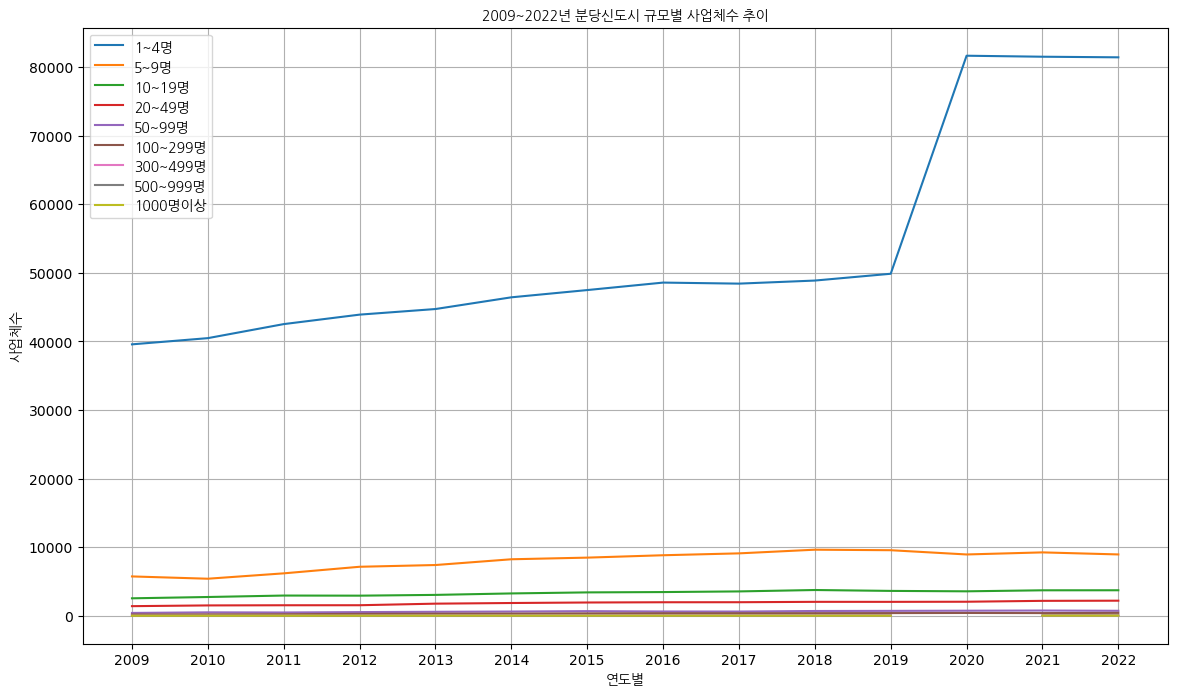

In [5]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

fontprop = FontProperties(fname='NanumGothic.ttf')

# 데이터프레임 피벗
pivot_df = filtered_sum_df.pivot(index='시점', columns='항목', values='전 산 업')

# Ensure the index and columns are of string type
pivot_df.index = pivot_df.index.astype(str)
pivot_df.columns = pivot_df.columns.astype(str)

# Specify the order of columns for the legend
order = ['1~4명', '5~9명', '10~19명', '20~49명', '50~99명', '100~299명', '300~499명', '500~999명', '1000명이상']
pivot_df = pivot_df[order]

# 꺾은선 그래프 그리기
plt.figure(figsize=(14, 8))
for column in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[column].astype(float), label=column)

plt.title('2009~2022년 분당신도시 규모별 사업체수 추이', fontproperties=fontprop)
plt.xlabel('연도별', fontproperties=fontprop)
plt.ylabel('사업체수', fontproperties=fontprop)
plt.legend(order, loc='best', prop=fontprop)
plt.grid(True)
plt.show()


In [6]:
import pandas as pd
import glob

file_paths = glob.glob('*별_사업체수__종사자수*.csv')

dfs = [pd.read_csv(file, encoding='cp949', header=0) for file in file_paths]
df_merged = pd.concat(dfs, ignore_index=True)

display(df_merged)
display(df_merged.shape)

,시점,항목,동별,전 산 업,농업 임업 및 어업 (01 ~ 03),광업 (05 ~ 08),제조업 (10 ~ 33),전기 가스 증기 및 수도사업 (35 ~ 36),하수 · 폐기물 처리 원료재생 및 환경복원업 (37 ~ 39),건설업 (41 ~ 42),...,건설업(41~42),운수 및 창고업(49~52),숙박 및 음식점업(55~56),정보통신업(58~63),금융 및 보험업(64~66),부동산업(68),전문 과학 및 기술 서비스업(70~73),사업시설 관리 사업 지원 및 임대 서비스업(74~76),예술 스포츠 및 여가관련 서비스업(90~91),협회 및 단체 수리 및 기타 개인 서비스업(94~96)
0,2009,사업체수 (개소),성남시,49441,4,1,3170,12,34,40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2009,사업체수 (개소),수정구,12963,2,-,477,4,6,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2009,사업체수 (개소),신흥1동,1287,-,-,34,-,-,-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2009,사업체수 (개소),신흥2동,1096,-,-,45,-,1,-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2009,사업체수 (개소),신흥3동,1162,-,-,25,-,-,-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1255,2022,종사자수 (명),구미1동,9805,NaN,NaN,NaN,NaN,NaN,NaN,...,1972.0,99.0,896.0,257,45,412.0,720,704.0,168.0,494.0
1256,2022,종사자수 (명),판교동,4541,NaN,NaN,NaN,NaN,NaN,NaN,...,457.0,32.0,607.0,236,58,229.0,195,64.0,159.0,314.0
1257,2022,종사자수 (명),삼평동,99075,NaN,NaN,NaN,NaN,NaN,NaN,...,1977.0,954.0,3475.0,44046,1297,2158.0,18379,9717.0,285.0,647.0
1258,2022,종사자수 (명),백현동,24222,NaN,NaN,NaN,NaN,NaN,NaN,...,319.0,317.0,2186.0,10794,2776,434.0,970,460.0,288.0,515.0


(1260, 38)

In [7]:
# 필터링할 항목 리스트
filter_items = [
    '야탑동', '이매동', '서현동', 
    '분당동', '수내동', '정자동', 
    '금곡동', '구미동', '야탑1동', 
    '야탑2동', '야탑3동', '이매1동', 
    '이매2동', '서현1동', '서현2동', 
    '분당1동', '분당2동', '수내1동', 
    '수내2동', '수내3동', '정자1동', 
    '정자2동', '정자3동', '금곡1동', 
    '금곡2동', '구미1동', '구미2동'
]

# Convert '항목' column to string type
df_merged.replace('-', 0, inplace=True)
df_merged['항목'] = df_merged['항목'].astype(str)

# 데이터프레임 필터링
filtered_df = df_merged[df_merged['동별'].apply(lambda x: any(item in x for item in filter_items))].fillna(0)
filtered_df.drop(columns=['항목'], inplace=True)

# 필터링된 데이터프레임 출력
display(filtered_df)
display(filtered_df.shape)

,시점,동별,전 산 업,농업 임업 및 어업 (01 ~ 03),광업 (05 ~ 08),제조업 (10 ~ 33),전기 가스 증기 및 수도사업 (35 ~ 36),하수 · 폐기물 처리 원료재생 및 환경복원업 (37 ~ 39),건설업 (41 ~ 42),도매 및 소매업(45~47),...,건설업(41~42),운수 및 창고업(49~52),숙박 및 음식점업(55~56),정보통신업(58~63),금융 및 보험업(64~66),부동산업(68),전문 과학 및 기술 서비스업(70~73),사업시설 관리 사업 지원 및 임대 서비스업(74~76),예술 스포츠 및 여가관련 서비스업(90~91),협회 및 단체 수리 및 기타 개인 서비스업(94~96)
31,2009,분당동,405,0,0,6,4,0,0,69,...,0.0,0.0,0.0,0,0,0.0,0,0.0,0.0,0.0
32,2009,수내1동,1696,0,0,42,0,0,0,542,...,0.0,0.0,0.0,0,0,0.0,0,0.0,0.0,0.0
33,2009,수내2동,500,0,0,7,0,0,0,175,...,0.0,0.0,0.0,0,0,0.0,0,0.0,0.0,0.0
34,2009,수내3동,475,0,0,7,0,0,0,87,...,0.0,0.0,0.0,0,0,0.0,0,0.0,0.0,0.0
35,2009,정자1동,2837,0,0,60,0,0,2,626,...,0.0,0.0,0.0,0,0,0.0,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1251,2022,야탑2동,7235,0,0,0,0,0,0,589,...,232.0,147.0,240.0,138,17,208.0,4087,28.0,57.0,176.0
1252,2022,야탑3동,14395,0,0,0,0,0,0,2362,...,762.0,1270.0,532.0,532,38,384.0,1436,1535.0,492.0,470.0
1253,2022,금곡동,13514,0,0,0,0,0,0,2648,...,932.0,752.0,1028.0,750,175,658.0,641,1718.0,203.0,779.0
1254,2022,구미동,23057,0,0,0,0,0,0,2917,...,2074.0,1083.0,1160.0,1495,232,1425.0,2596,1524.0,215.0,480.0


(424, 37)

In [8]:
# 각 행의 2번째 컬럼부터 끝까지의 값을 더한 합계를 새로운 컬럼 '합계'에 추가
numeric_cols = filtered_df.select_dtypes(include='number').columns
filtered_df['전 산 업'] = filtered_df['전 산 업'].astype(float)
filtered_sum_df = filtered_df[['시점', '동별', '전 산 업']]

# 필터링된 데이터프레임 출력
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(filtered_sum_df)
display(filtered_sum_df.shape)

,시점,동별,전 산 업
31,2009,분당동,405.0
32,2009,수내1동,1696.0
33,2009,수내2동,500.0
34,2009,수내3동,475.0
35,2009,정자1동,2837.0
36,2009,정자2동,264.0
37,2009,정자3동,340.0
38,2009,서현1동,2640.0
39,2009,서현2동,731.0
40,2009,이매1동,676.0


(424, 3)

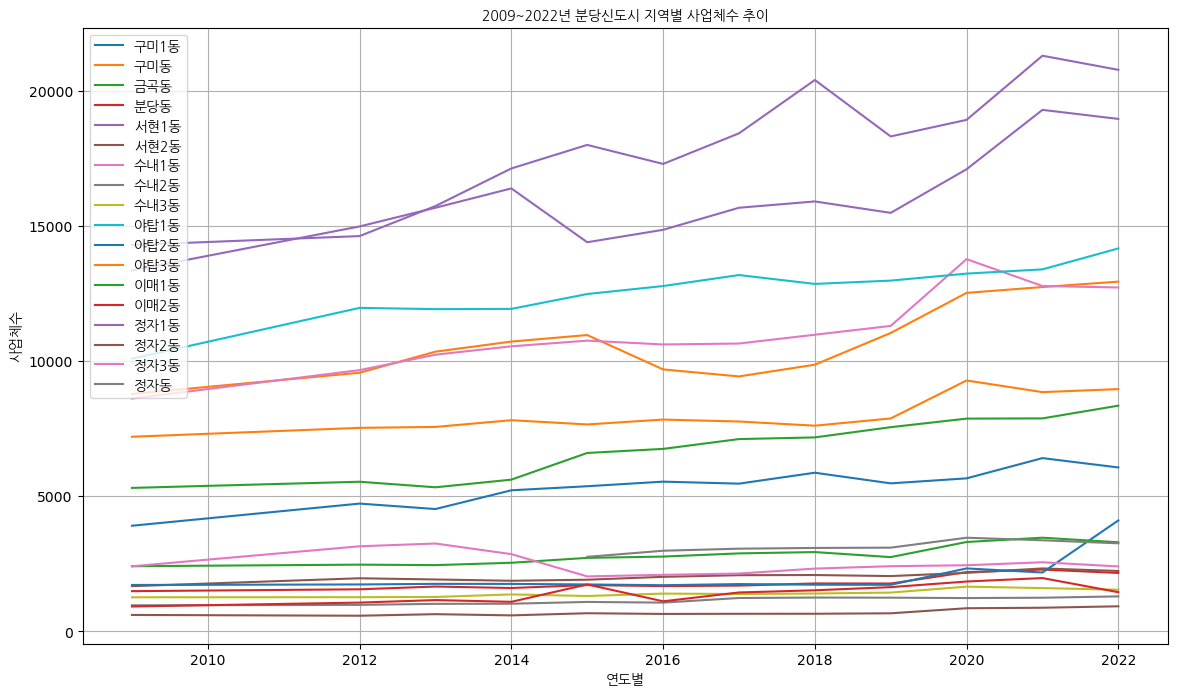

In [9]:
import matplotlib.pyplot as plt

# Remove duplicate entries by averaging the values
filtered_sum_df = filtered_sum_df.groupby(['시점', '동별'], as_index=False).mean()

# 데이터프레임 피벗
pivot_df = filtered_sum_df.pivot(index='시점', columns='동별', values='전 산 업')

# Convert column values to strings
pivot_df.columns = pivot_df.columns.astype(str)

# 꺾은선 그래프 그리기
plt.figure(figsize=(14, 8))
for column in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[column], label=str(column))

plt.title('2009~2022년 분당신도시 지역별 사업체수 추이', fontproperties=fontprop)
plt.xlabel('연도별', fontproperties=fontprop)
plt.ylabel('사업체수', fontproperties=fontprop)
plt.legend(loc='best', prop=fontprop)
plt.grid(True)
plt.show()